In [221]:
import cp as cp
import importlib
importlib.reload(cp)
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter 
import os

In [222]:
rootpath = "/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column"
tracer = os.path.join(rootpath,"tracer")
implicit = os.path.join(rootpath,"implicit")
operator_splitting = os.path.join(rootpath,"operator-splitting")
SNI = os.path.join(operator_splitting,"SNI")
fully_decouple = os.path.join(tracer,"2pdecoupled")
column = os.path.join(rootpath,"column")
column_oper = os.path.join(column,"operator-splitting")
new_decoupling = os.path.join(rootpath,"new-decoupling")

# Correct Paraview

In [277]:
# pvd_list_implicit = cp.find_pvd(implicit)
# pvd_list_fully = cp.find_pvd(fully_decouple)
pvd_list_SNI = cp.find_pvd(SNI)
# cp.correctOrder(implicit)
# cp.correctOrder(fully_decouple)
cp.correctOrder(implicit)
cp.correctOrder(new_decoupling)

SNI_43200_43200_SNI_r.pvd
OS_54000_54000_SNI_t.pvd
OS_5400_5400_SNI_r.pvd
SNI_43200_43200_SNI_t.pvd
OS_54000_54000_SNI_r.pvd
OS_5400_5400_SNI_t.pvd
PC_5400_5400_SNI_t.pvd
PC_54000_54000_SNI_t.pvd
PC_5400_5400_SNI_r.pvd
PC_54000_54000_SNI_r.pvd
bothphases_54000.pvd
bothphase.pvd


In [229]:
# cp.find_pvd(column+"/implicit")
SNI_dat = cp.find_dat(SNI)
implicit_dat = cp.find_dat(implicit)

OS_54000_54000_SNI_t.dat
OS_5400_5400_SNI_t.dat
OS_54000_54000_SNI_r.dat
PC_54000_54000_SNI_t.dat
PC_5400_5400_SNI_t.dat
bothphases_54000.dat


In [51]:
SNI_dat

['/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/operator-splitting/SNI/SNI_43200_43200_SNI_t.dat',
 '/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/operator-splitting/SNI/OS_5400_5400_SNI_t.dat',
 '/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/operator-splitting/SNI/PC_5400_5400_SNI_t.dat']

In [70]:
cp.correctParaview(column_oper+"/00_CH4_inj_cor_10800_10800_SNI_r.pvd")

In [78]:
cp.correctOrder(fully_decouple)

fully2p_43200_r.pvd
fully2p_43200_tracer.pvd
fully2p_43200_2p.pvd


## read data

In [200]:
dat_list_new = cp.find_dat(new_decoupling)

singlephases_54000.dat
bothphases_54000.dat


### cal_CH4_sum calculate 

bothphase.dat
bothphases_54000.dat
0 = bothphase 
0.03251244446983106
1 = bothphases_54000 
0.07474090126358833


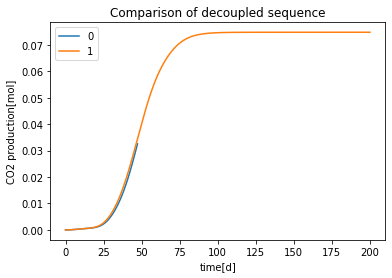

In [314]:
dataset1 = cp.find_dat(new_decoupling)
dataset2 = cp.find_dat(implicit)

dataset = dataset1 + dataset2

fig, ax = plt.subplots()

for i in range(len(dataset)):
    try:
        name = str(dataset[i])
        name = name.split(".")[0].split("/")[-1]
        print("{} = {} ".format(i,name))
        data = cp.cal_CH4_sum(dataset[i])
        x = data.time_in_day
        y=data.molCH4_sum
        print(y.iloc[-1])
        line, = ax.plot(x, y, label= i)
    except:
        next
    finally:
        next

# data = cp.cal_CH4_sum(SNI_dat[2])
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line, = ax.plot(x, y, label='R+T')


ax.legend()
ax.set_xlabel("time[d]")
ax.set_ylabel("CO2 production[mol]")
ax.set_title("Comparison of decoupled sequence")  # 2pt line, 2pt break, 10pt line, 2pt break
fig.savefig("TR.png",transparent=True)
plt.show()

bothphases_54000.dat
0 = bothphases_54000 
0.07474090126358833


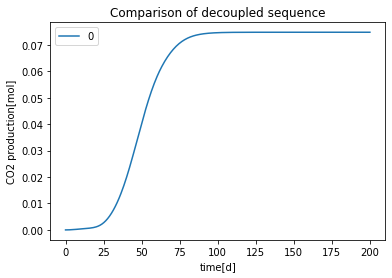

In [310]:
dataset = cp.find_dat(implicit)

fig, ax = plt.subplots()

for i in range(len(dataset)):
    try:
        name = str(dataset[i])
        name = name.split(".")[0].split("/")[-1]
        print("{} = {} ".format(i,name))
        data = cp.cal_CH4_sum(dataset[i])
        x = data.time_in_day
        y=data.molCH4_sum
        print(y.iloc[-1])
        line, = ax.plot(x, y, label= i)
    except:
        next
    finally:
        next

# data = cp.cal_CH4_sum(SNI_dat[2])
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line, = ax.plot(x, y, label='R+T')


ax.legend()
ax.set_xlabel("time[d]")
ax.set_ylabel("CO2 production[mol]")
ax.set_title("Comparison of decoupled sequence")  # 2pt line, 2pt break, 10pt line, 2pt break
fig.savefig("TR.png",transparent=True)
plt.show()

OS_54000_54000_SNI_t.dat
OS_5400_5400_SNI_t.dat
OS_54000_54000_SNI_r.dat
PC_54000_54000_SNI_t.dat
PC_5400_5400_SNI_t.dat
0 = OS_54000_54000_SNI_t 
0.0744410471615435
1 = OS_5400_5400_SNI_t 
0.07463669776080757
2 = OS_54000_54000_SNI_r 
3 = PC_54000_54000_SNI_t 
0.0744410471615435
4 = PC_5400_5400_SNI_t 
0.07454120985465046


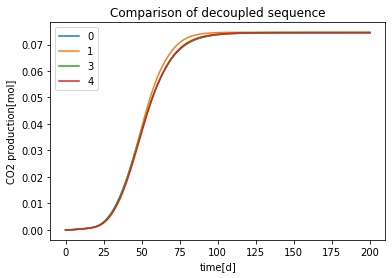

In [28]:
dataset = cp.find_dat(SNI)

fig, ax = plt.subplots()

for i in range(len(dataset)):
    try:
        name = str(dataset[i])
        name = name.split(".")[0].split("/")[-1]
        print("{} = {} ".format(i,name))
        data = cp.cal_CH4_sum(dataset[i])
        x = data.time_in_day
        y=data.molCH4_sum
        print(y.iloc[-1])
        line, = ax.plot(x, y, label= i)
    except:
        next
    finally:
        next

# data = cp.cal_CH4_sum(SNI_dat[2])
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line, = ax.plot(x, y, label='R+T')


ax.legend()
ax.set_xlabel("time[d]")
ax.set_ylabel("CO2 production[mol]")
ax.set_title("Comparison of decoupled sequence")  # 2pt line, 2pt break, 10pt line, 2pt break
fig.savefig("TR.png",transparent=True)
plt.show()

In [9]:

ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("CH4 production")
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
plt.show()

In [35]:
def cal_CH4_sum(data_file, p = False):
    data = pd.read_csv(data_file,sep= " ",)
    data.rename(columns={"#time":"time"},inplace=True)
    data.dropna(axis=1,inplace=True)
    data["CH4w"] = data["molCH4w"]*data["timeStepSize"]
    data["CH4n"] = data["molCH4n"]*data["timeStepSize"]
    data["molCH4w_sum"] = data.CH4w.cumsum()
    data["molCH4n_sum"] = data.CH4n.cumsum()
    data["molCH4_sum"] = data.molCH4n_sum + data.molCH4w_sum
    data["time_in_day"] = data.time/86400
    if p :
        for name in data.columns:
            print(name)
    return data

In [82]:
cal_CH4_sum(path+"/bothphases.dat")

NameError: name 'cal_CH4_sum' is not defined

#### calculate reference

In [ ]:
fig, ax = plt.subplots()

file = ""
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line, = ax.plot(x, y, label='ref')
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break


0.07455523149095382
0.07452080943270246
0.07451803412124033


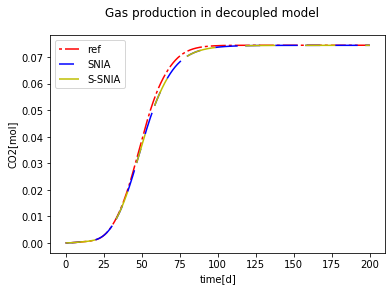

In [364]:
fig, ax = plt.subplots()

file = column +"/implicit/00_9000_inj_cor_ref.dat"
data = cp.cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line, = ax.plot(x, y, label='ref',color = 'r')
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# file = "implicit/00_21600_inj_cor_ref.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line, = ax.plot(x, y, label='ref-216')
# line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

file = column +"/operator-splitting/00_CH4_inj_cor_1800_1800_SNI_t.dat"
data = cp.cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='SNIA',color = 'b')
line1.set_dashes([10, 10, 15, 5]) 

file = column +"/operator-splitting/00_CH4_inj_cor_3600_1800_StrangSNI_t.dat"
data = cp.cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='S-SNIA',color = 'y')
line1.set_dashes([20, 20, 20, 20]) 

# file = "operator-splitting/00_CH4_inj_cor_3600_3600_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='3600')

# file = "operator-splitting/00_CH4_inj_cor_5400_5400_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='5400')

# file = "operator-splitting/00_CH4_inj_cor_7200_7200_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='7200')

# file = "operator-splitting/00_CH4_inj_cor_9000_9000_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='9000')

# file = "operator-splitting/00_CH4_inj_cor_10800_10800_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='10800')

# file = "operator-splitting/00_CH4_inj_cor_14400_14400_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='14400')

# file = "operator-splitting/00_CH4_inj_cor_18000_18000_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='18000')

# file = "operator-splitting/00_CH4_inj_cor_21600_21600_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='21600')

# file = "operator-splitting/00_CH4_inj_cor_36000_36000_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='36000')

# file = "operator-splitting/00_CH4_inj_cor_43200_43200_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='43200')

# file = "operator-splitting/00_CH4_inj_cor_48600_48600_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='48600')

# file = "operator-splitting/00_CH4_inj_cor_54000_54000_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='54000')

# file = "operator-splitting/00_CH4_inj_cor_108000_108000_SNI_t.dat"
# data = cal_CH4_sum(file)
# x = data.time_in_day
# y=data.molCH4_sum
# print(y.iloc[-1])
# line1, = ax.plot(x, y, label='108000')

ax.legend()
fig.suptitle("Gas production in decoupled model")
ax.set_xlabel("time[d]")
ax.set_ylabel("CO2[mol]")
fig.savefig("gas_pro.png",transparent = True)
plt.show()

0.0745322677587371
0.07451752718758761
0.0744839862845788
0.07445388501520599
0.07441988821724042
0.07438684596028548
0.07435421360854805


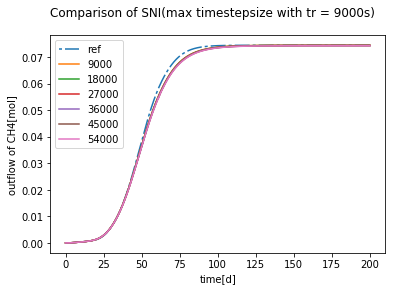

In [54]:
fig, ax = plt.subplots()

file = "implicit/00_3600_inj_cor_ref.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line, = ax.plot(x, y, label='ref')
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

file = "operator-splitting/00_CH4_inj_cor_9000_9000_SNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='9000')

file = "operator-splitting/00_CH4_inj_cor_18000_9000_SNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='18000')

file = "operator-splitting/00_CH4_inj_cor_27000_9000_SNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='27000')

file = "operator-splitting/00_CH4_inj_cor_36000_9000_SNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='36000')

file = "operator-splitting/00_CH4_inj_cor_45000_9000_SNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='45000')

file = "operator-splitting/00_CH4_inj_cor_54000_9000_SNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='54000')

ax.legend()
fig.suptitle("Comparison of SNI(max timestepsize with tr = 9000s)")
ax.set_xlabel("time[d]")
ax.set_ylabel("outflow of CH4[mol]")

plt.show()

0.0745322677587371
0.07451803412124033
0.07451568111857604
0.07451256253667422
0.07450824922780915
0.07449980766182822
0.074496735911607
0.07448479937377477
0.0744826106078172
0.07446739388740765
0.05748090163610065
0.07444594145448985


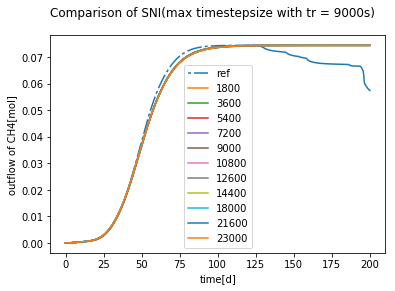

In [382]:
fig, ax = plt.subplots()

file = "implicit/00_3600_inj_cor_ref.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line, = ax.plot(x, y, label='ref')
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

file = "operator-splitting/00_CH4_inj_cor_3600_1800_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='1800')

file = "operator-splitting/00_CH4_inj_cor_7200_3600_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='3600')

file = "operator-splitting/00_CH4_inj_cor_10800_5400_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='5400')

file = "operator-splitting/00_CH4_inj_cor_14400_7200_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='7200')

file = "operator-splitting/00_CH4_inj_cor_18000_9000_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='9000')

file = "operator-splitting/00_CH4_inj_cor_21600_10800_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='10800')

file = "operator-splitting/00_CH4_inj_cor_25200_12600_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='12600')

file = "operator-splitting/00_CH4_inj_cor_28800_14400_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='14400')

file = "operator-splitting/00_CH4_inj_cor_36000_18000_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='18000')

file = "operator-splitting/00_CH4_inj_cor_43200_21600_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='21600')

file = "operator-splitting/00_CH4_inj_cor_46000_46000_StrangSNI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='23000')

ax.legend()
fig.suptitle("Comparison of SNI(max timestepsize with tr = 9000s)")
ax.set_xlabel("time[d]")
ax.set_ylabel("outflow of CH4[mol]")
plt.show()

0.0745322677587371
0.0035913147192380445


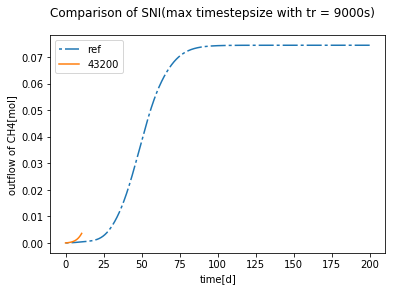

time  timeStepSize       molCH4w       molCH4n  iter      CH4w  \
110  872204.0       10800.0  1.042990e-08  6.203870e-15     2  0.000113   
111  883004.0       10800.0  1.078260e-08  6.413620e-15     2  0.000116   
112  893804.0       10800.0  1.098660e-08  6.528700e-15     1  0.000119   
113  904604.0       10800.0  1.133070e-08  6.739210e-15     2  0.000122   
114  915404.0       10800.0  1.168890e-08  6.952180e-15     2  0.000126   

             CH4n  molCH4w_sum   molCH4n_sum  molCH4_sum  time_in_day  
110  6.700180e-11     0.003108  1.848298e-09    0.003108    10.094954  
111  6.926710e-11     0.003224  1.917565e-09    0.003224    10.219954  
112  7.050996e-11     0.003343  1.988075e-09    0.003343    10.344954  
113  7.278347e-11     0.003465  2.060858e-09    0.003465    10.469954  
114  7.508354e-11     0.003591  2.135942e-09    0.003591    10.594954

In [309]:
fig, ax = plt.subplots()

file = "implicit/00_3600_inj_cor_ref.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line, = ax.plot(x, y, label='ref')
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break


file = "operator-splitting/00_CH4_inj_cor_10800_10800_1_1_10000_SI_t.dat"
data = cal_CH4_sum(file)
x = data.time_in_day
y=data.molCH4_sum
print(y.iloc[-1])
line1, = ax.plot(x, y, label='43200')

ax.legend()

fig.suptitle("Comparison of SNI(max timestepsize with tr = 9000s)")
ax.set_xlabel("time[d]")
ax.set_ylabel("outflow of CH4[mol]")
plt.show()

data.tail()

# Parameter

In [ ]:
import comparision as cp

In [ ]:
para = cp.returnParasDict(inputfile="implicit/test_mecbmcolumnCoal11.input")

# SI

In [6]:
def return_iter(filename):
    with open(filename) as f:
        lines = f.readlines()
    
    i = [];
    err = [];
    p = False
    for line in lines:
        if p == True:
            err.append(line.split(" ")[-1])
            p = False
        if "i = " in line:
            i.append(line.split(" ")[-1])
            p = True

    for idx,val in enumerate(err):
        err[idx] = float(err[idx].split('\n')[0])

    for idx,val in enumerate(i):
        i[idx] = int(i[idx].split(' ')[0])
    return i,err

In [5]:
def return_iter_new(filename):
    with open(filename) as f:
        lines = f.readlines()
        
    i = [];
    err = [];
    p = False
    for line in lines:
        if p == True:
            i.append(line.split(" ")[-1])
            p = False
        if "max relative error " in line:
            err.append(line.split(" ")[-1])
            p = True

    for idx,val in enumerate(err):
        err[idx] = float(err[idx].split('\n')[0])
    for idx,val in enumerate(i):
          i[idx] = int(i[idx].split("\\")[0])
    return i,err

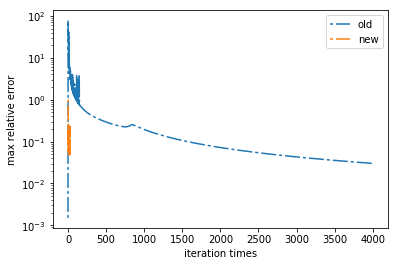

In [7]:
fig, ax = plt.subplots()

x,y = return_iter("out.txt")
x1 = x[1:];
y1 = y[1:];
line, = ax.plot(x, y, label='old')
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

x,y = return_iter_new("out2.txt")
x = x;
y = y;
line, = ax.plot(x, y, label='new')
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

ax.legend()

fig.suptitle("")
ax.set_xlabel("iteration times")
ax.set_ylabel("max relative error")
ax.set_yscale("log")
plt.show()


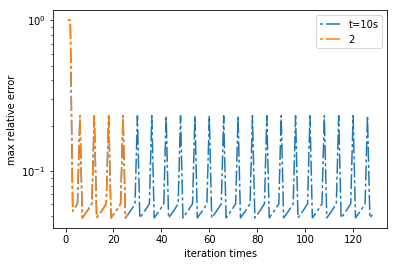

In [6]:
fig, ax = plt.subplots()

x,y = return_iter_new("out1.txt")
x1 = x[1:];
y1 = y[1:];
line, = ax.plot(x, y, label='t=10s')
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

x,y = return_iter_new("out2.txt")
x = x;
y = y;
line, = ax.plot(x, y, label='2')
line.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

ax.legend()

fig.suptitle("")
ax.set_xlabel("iteration times")
ax.set_ylabel("max relative error")
ax.set_yscale("log")
plt.show()

In [43]:
order_path = os.path.join(rootpath,"comparison_os")
os_files = os.listdir(order_path)
os_csvs = []
for file in os_files:
    os_csvs.append(os.path.join(order_path,file))

In [44]:
os_files

['ref-b.csv',
 'ref-t.csv',
 'SNI-b.csv',
 'SNI-t.csv',
 'new-11_11.csv',
 'SSNI-B.csv',
 'SSNI-T.csv',
 'ref-11_11.csv',
 'SNI_r_b.csv']

In [73]:
labels = ["Ref.(Bottom)","Ref.(Top)","SNIA(Bottom)","SNIA(Top)","S-SNIA(Bottom)","S-SNIA(Top)"]
colors = ["r","r","b","b","g","g"]

fig, ax = plt.subplots()
for i in range(0,6):
    file = os_csvs[i]
    data = pd.read_csv(file)
    print(file)
    x = data["Time"]/86400
    y = data["avg(S_n)"]
    line_, = ax.plot(x, y, label=labels[i],color = colors[i])
    if (i%2) ==0: 
        line_.set_dashes([2, 2, 10, 2]) 
    else:
        line_.set_dashes([2, 2, 2, 2]) 

ax.legend()
ax.set_title("Gas phase saturation")
ax.set_xlabel("Time[d]")
ax.set_ylabel("Volume fraction [-]")
plt.figure(figsize=(20,10))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.savefig("Growth_of_coalbac.png",dpi=200)

plt.show()

/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/ref-b.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/ref-t.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/SNI-b.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/SNI-t.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/SSNI-B.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/SSNI-T.csv


<Figure size 1440x720 with 0 Axes>

In [75]:
order_path = os.path.join(rootpath,"comparison_tr")
os_files = os.listdir(order_path)
os_csvs = []
for file in os_files:
    os_csvs.append(os.path.join(order_path,file))
os_files

['rt.csv', 'tr.csv']

In [77]:
labels = ["R+T(Bottom)","T+R(Bottom)"]
colors = ["C1","C0","b","b","g","g"]

fig, ax = plt.subplots()
for i in range(0,2):
    file = os_csvs[i]
    data = pd.read_csv(file)
    print(file)
    x = data["Time"]/86400
    y = data["avg(x^Amendment_w)"]
    line_, = ax.plot(x, y, label=labels[i],color = colors[i])
#     if (i%2) ==0: 
#         line_.set_dashes([2, 2, 10, 2]) 
#     else:
#         line_.set_dashes([2, 2, 2, 2]) 

ax.legend()
ax.set_title("Growth of Secondary Bac")
ax.set_xlabel("Time[d]")
ax.set_ylabel("Volume fraction [-]")
plt.figure(figsize=(20,10))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.savefig("Growth_of_coalbac.png",dpi=400,transparent = True)

plt.show()

/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_tr/rt.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_tr/tr.csv


<Figure size 1440x720 with 0 Axes>

###### find csv files in comparison_os

In [287]:
order_path = os.path.join(rootpath,"comparison_os")
os_files = os.listdir(order_path)
os_csvs = []
for file in os_files:
    os_csvs.append(os.path.join(order_path,file))

######  filter the csv

In [307]:
os_csvs_new = []
os_csvs_ref = []
for item in os_csvs:
    if "new" in item:
        os_csvs_new.append(item)
    if "ref" in item:
        os_csvs_ref.append(item)
os_csvs_new.sort()
os_csvs_ref.sort()
for item in os_csvs_new:
    print(item)

/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/new_btm.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/new_middle.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/new_top.csv


In [284]:
plot_names = []
for i in data_new.columns:
    if "avg" in i:
        plot_names.append(i)

/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/new_btm.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/ref_btm.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/new_middle.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/ref_middle.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/new_top.csv
/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/ref_top.csv


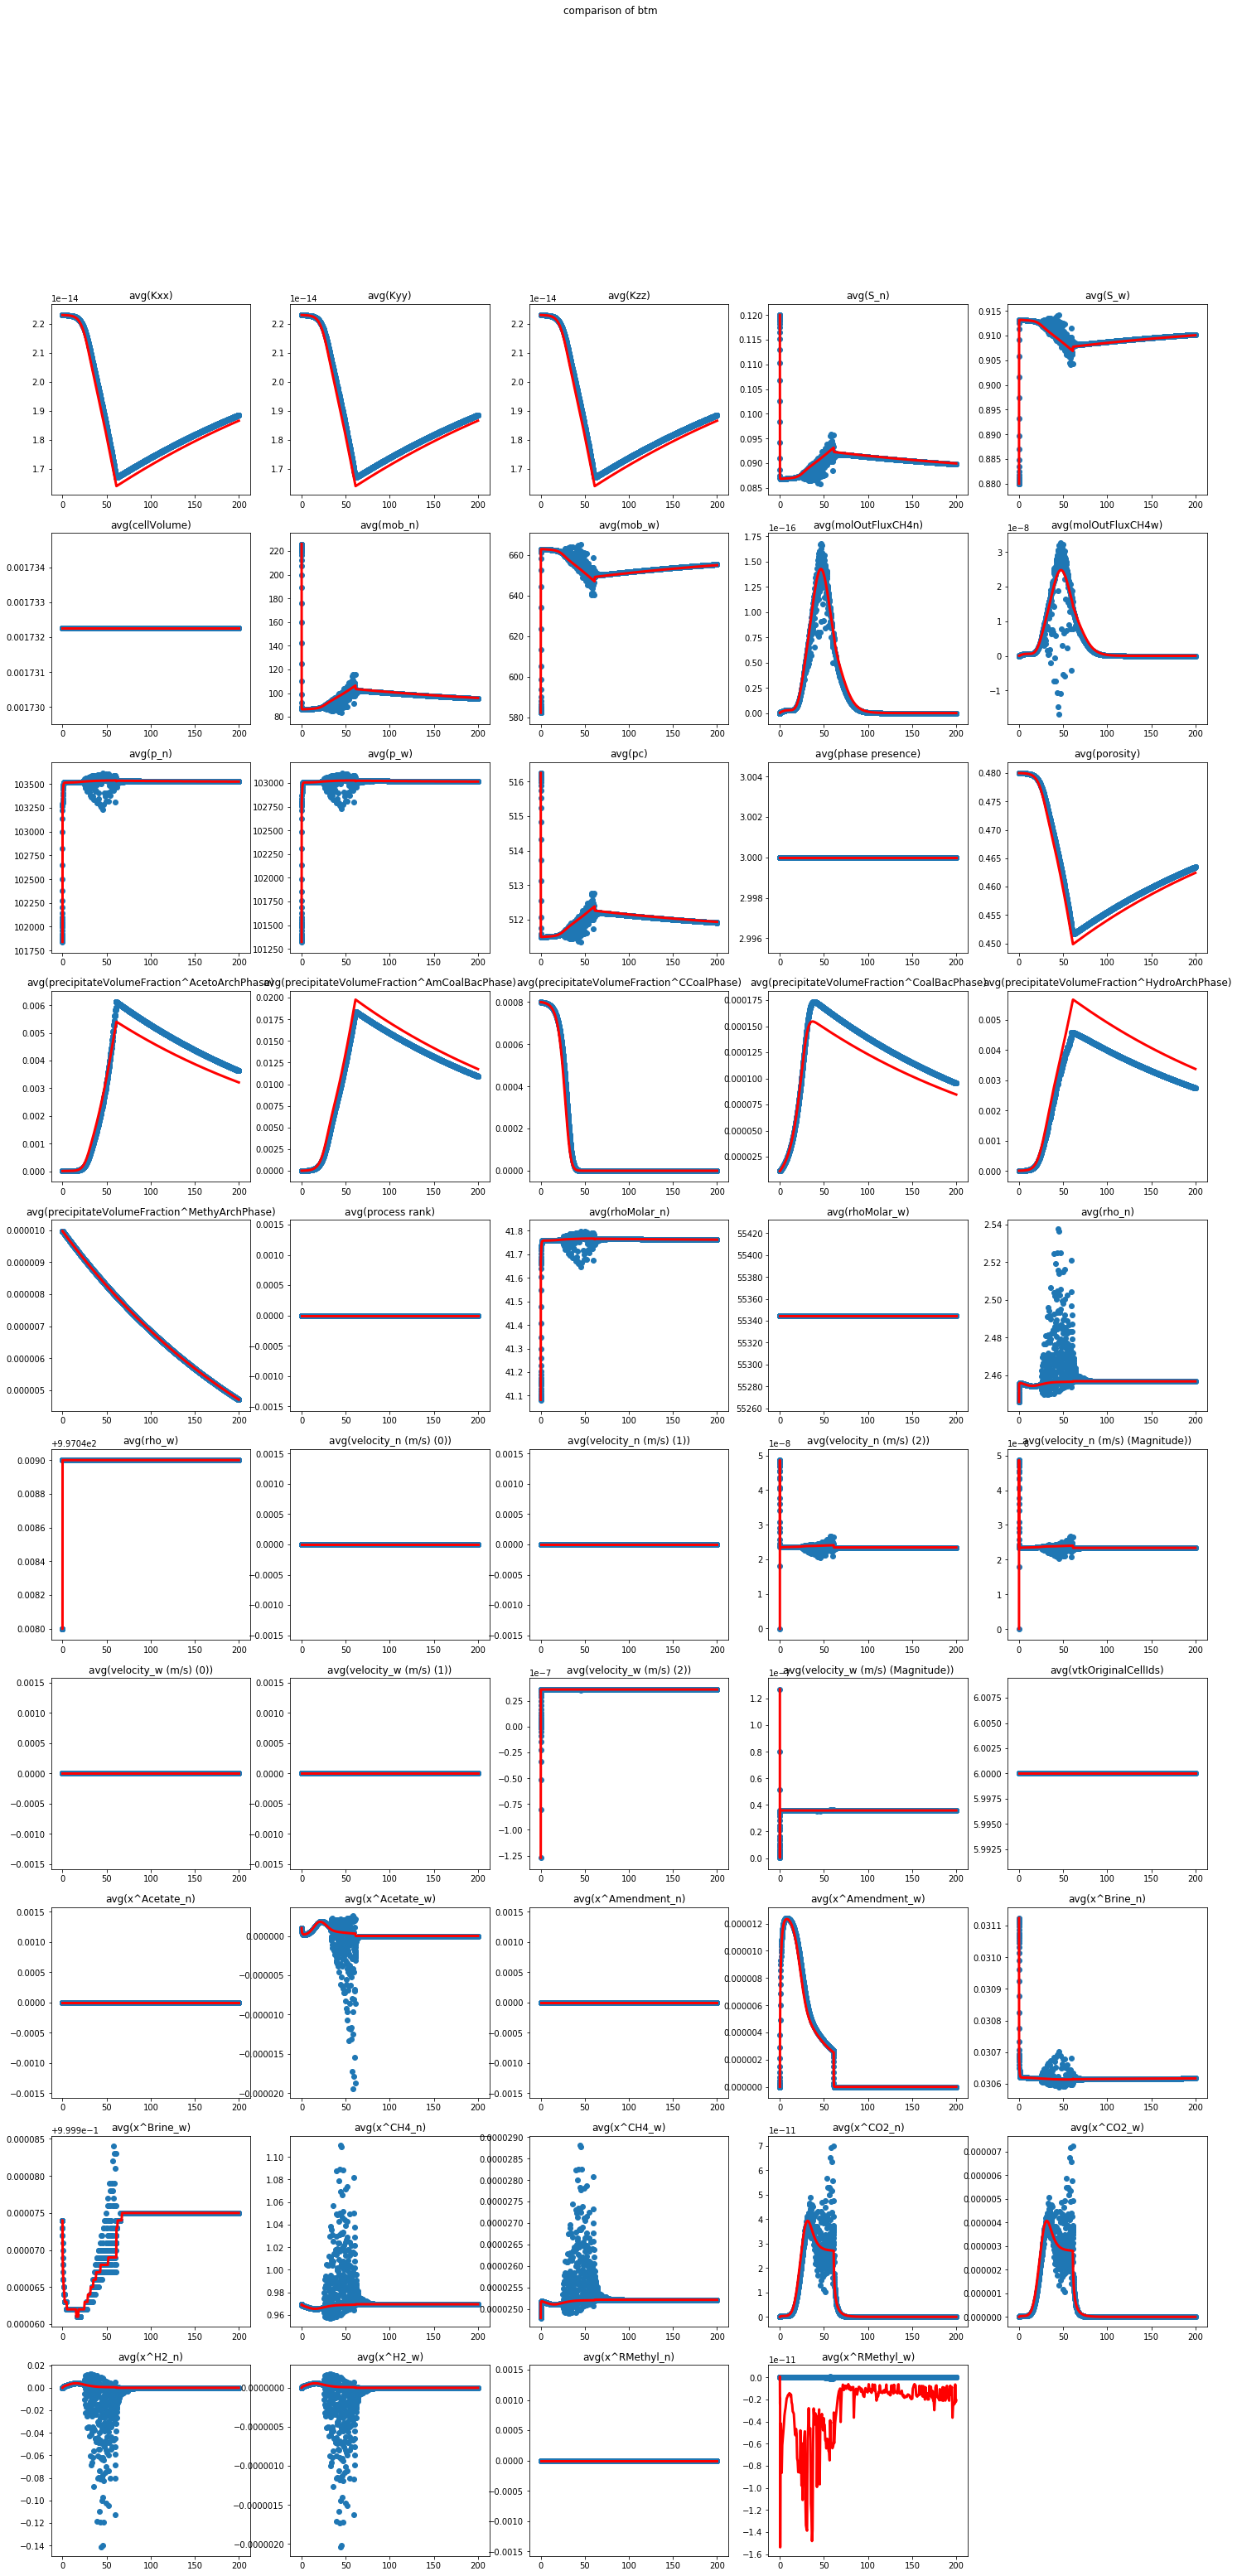

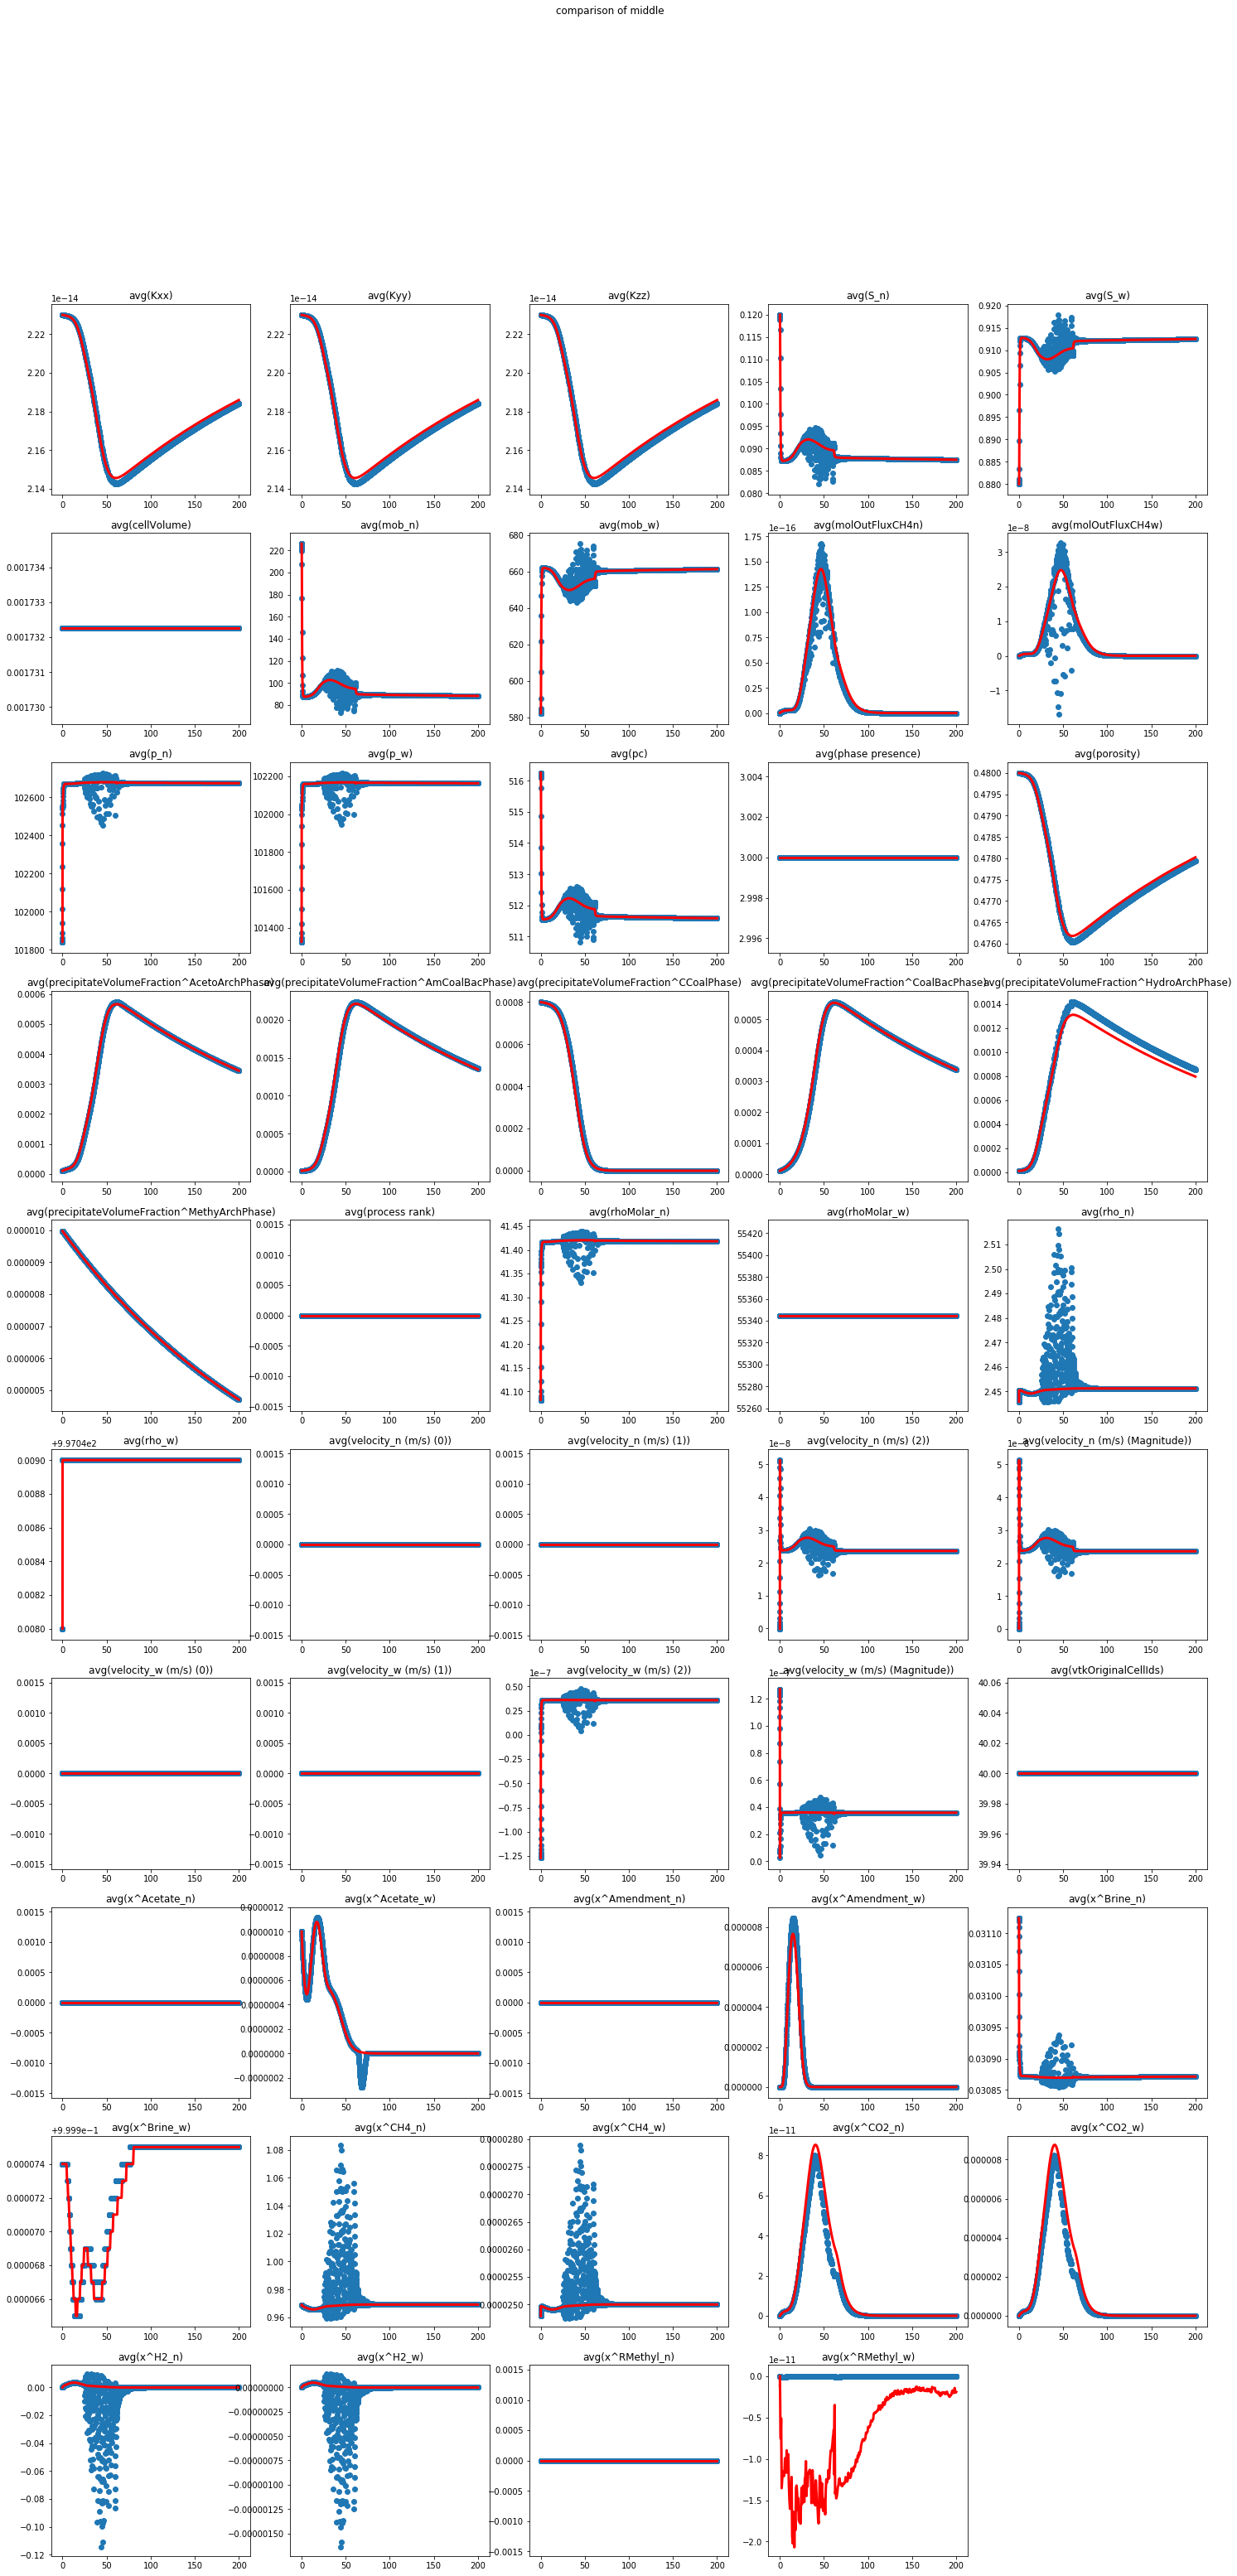

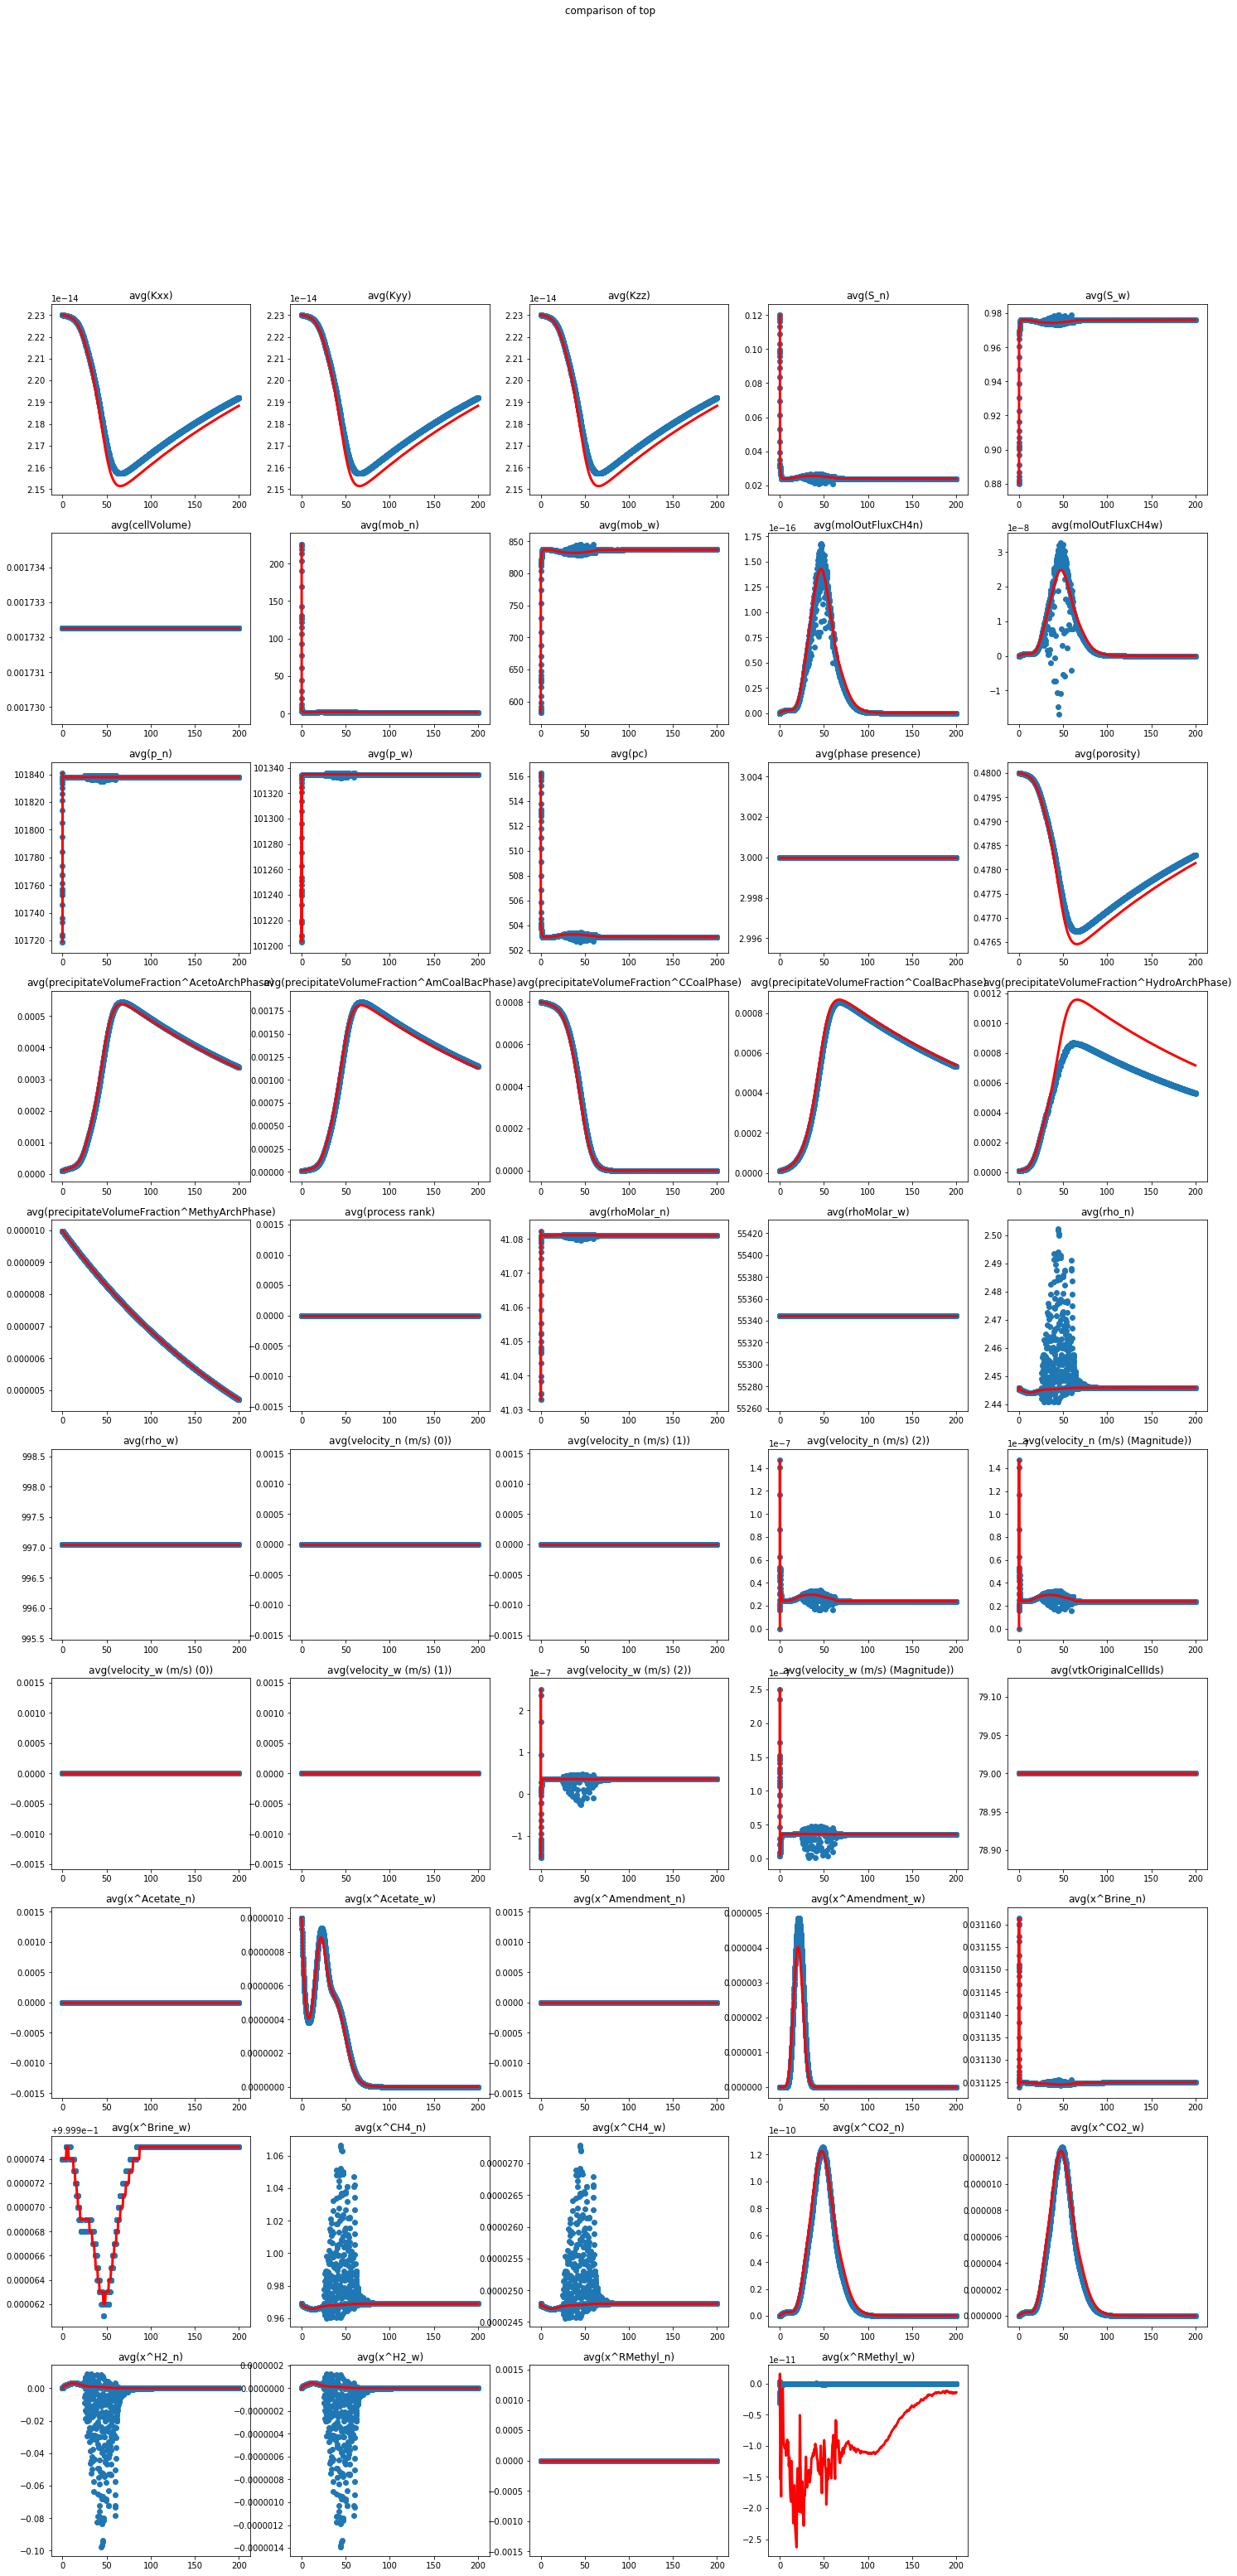

In [308]:
for pos in range(3):
    data_new = pd.read_csv(os_csvs_new[pos])
    print(os_csvs_new[pos])
    data_ref = pd.read_csv(os_csvs_ref[pos])
    print(os_csvs_ref[pos])
    name = os_csvs_new[pos].split(".")[0].split("_")[-1]
    plt.figure(figsize=(25, 50))
    for i in range(len(plot_names)):
        ax = plt.subplot(10,5,i+1)
        x = data_ref["Time"]/86400
        y = data_ref[plot_names[i]]
        ax.plot(x, y, color="red",linewidth=3)
    
        x = data_new["Time"]/86400
        y = data_new[plot_names[i]]
        ax.scatter(x, y)
    
        ax.set_title(plot_names[i])
    plt.suptitle("comparison of "+ name)
    plt.savefig( name+".png",dpi=200,transparent = False)
    #plt.show() 

In [306]:
os_csvs_new

['/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/new_btm.csv',
 '/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/new_middle.csv',
 '/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/new_top.csv']

In [304]:
os_csvs_ref

['/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/ref_btm.csv',
 '/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/ref_middle.csv',
 '/Users/ouetsu/ma/wang2019a/build-cmake/appl/mecbm/column/comparison_os/ref_top.csv']